In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

In [2]:
path = '/home/marchelo/MarcheloBragagnini/chambas/diplomado-LaSalle/download/dogs-vs-cats/'
dataset_train = path + 'train/'
dataset_test = path + 'test1/'
num_px = 64

In [3]:
def show_ten_images(images):
#     print("images[0]-> bgr color: %s"%(str(images[0][0, 0])))
    print("shape[0]-> shape : %s"%(str(images[0].shape)))
    fig = plt.figure(figsize=(36,16))
    for i in range(1, 11):
        fig.add_subplot(2,5,i)
        plt.imshow(images[i-1])
    plt.show()

shape[0]-> shape : (500, 414, 3)


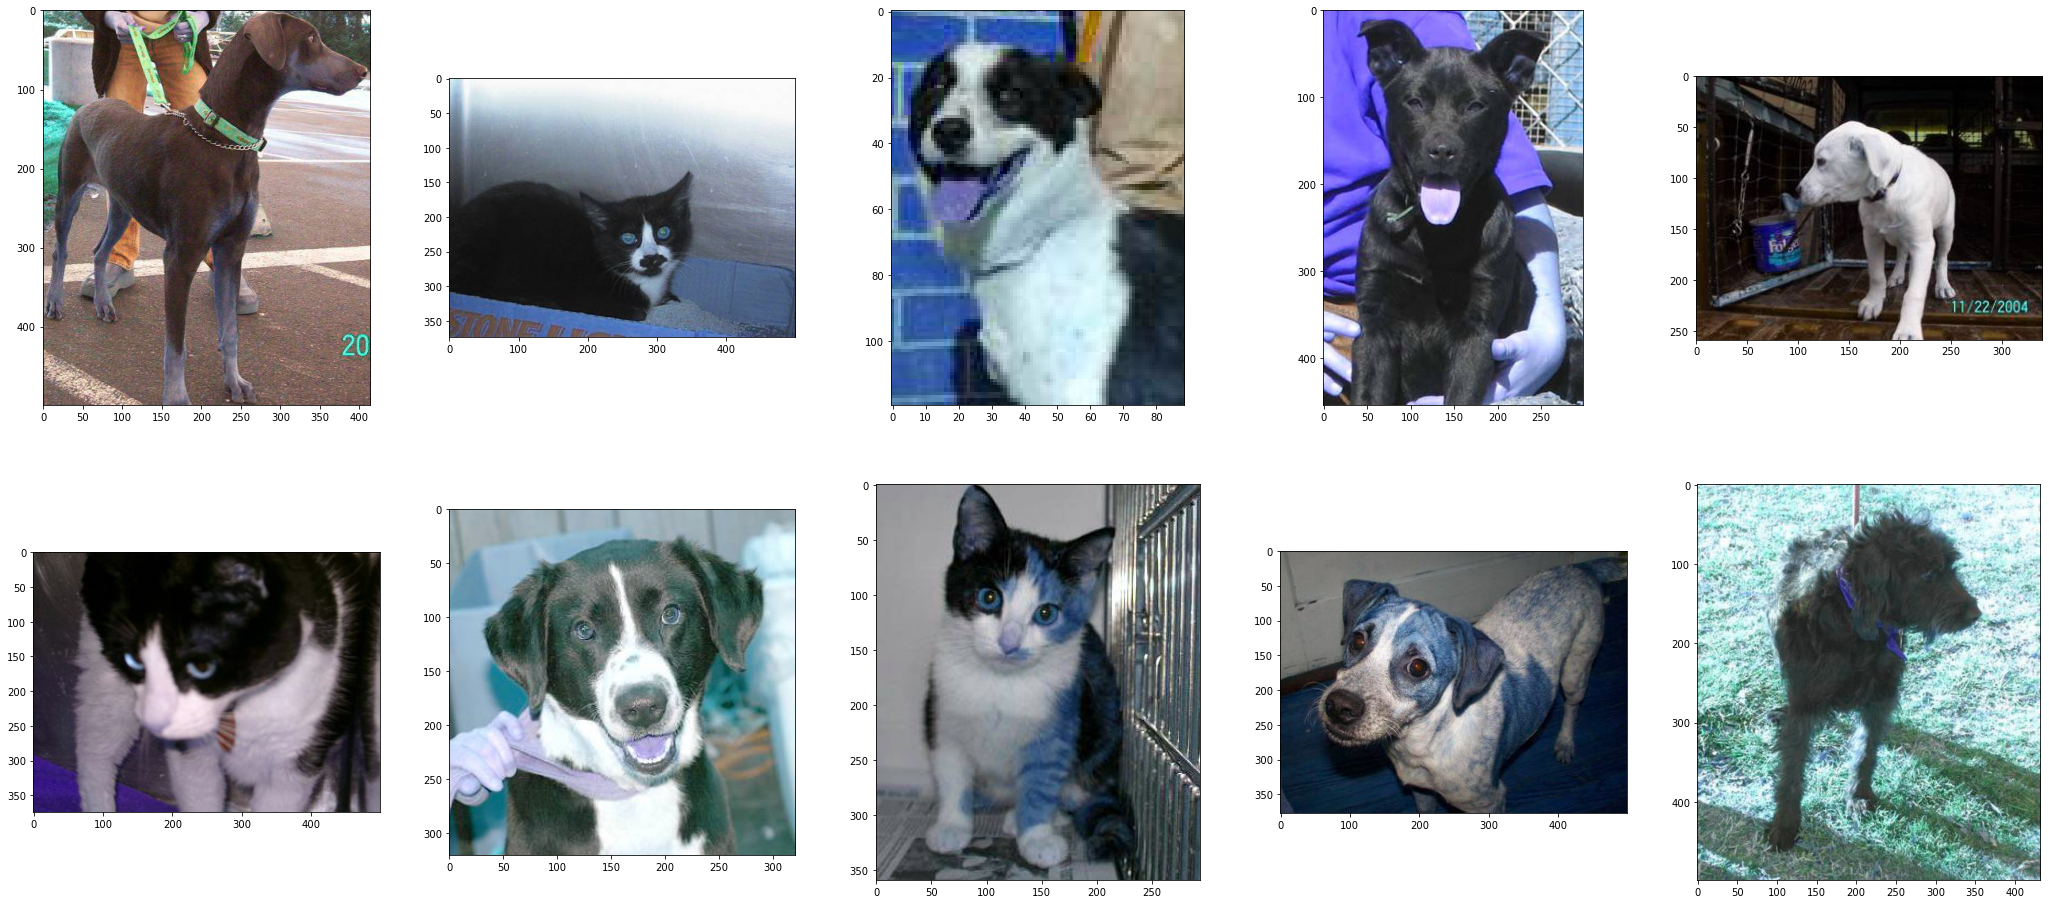

In [4]:
def load_10_images(path): 
    num_images = 10
    it = 0
    images = []
    for p in os.listdir(path):
        category = p.split('.')[0]
        img_array = cv2.imread(os.path.join(path, p), cv2.IMREAD_UNCHANGED)
        images.append(img_array)
        it = it + 1
        if it == num_images:
            break
            
    return images

images = load_10_images(dataset_train)
show_ten_images(images)

In [5]:
def generate_dataframe_cat_dogs_from_folder(folder):
    data = {'id': [], 'label_name': [], 'label_tag': [], 'file': []}
    for p in os.listdir(folder):
        split = p.split('.')
        _id, category = split[1], split[0]
        data['id'].append(str(_id))
        data['label_name'].append(category)
        data['label_tag'].append(0 if category == 'cat' else 1)
        data['file'].append(p)
        
    data_frame = pd.DataFrame(data, columns=['id', 'label_name', 'label_tag', 'file'])
    
    return data_frame

In [6]:
data_frame = generate_dataframe_cat_dogs_from_folder(dataset_train)
data_frame.head()

,id,label_name,label_tag,file
0,9222,dog,1,dog.9222.jpg
1,5742,cat,0,cat.5742.jpg
2,11119,dog,1,dog.11119.jpg
3,620,dog,1,dog.620.jpg
4,154,dog,1,dog.154.jpg


In [7]:
num_cats = (data_frame.label_name.values == 'cat').sum()
num_dogs = (data_frame.label_name.values == 'dog').sum()
print("numero de gatos %d"%(num_cats))
print("numero de perros %d"%(num_dogs))

numero de gatos 12500
numero de perros 12500


In [8]:
df_cat = data_frame.loc[data_frame['label_name'] == 'cat']
df_dog = data_frame.loc[data_frame['label_name'] == 'dog']

In [9]:
df_cat.head()

,id,label_name,label_tag,file
1,5742,cat,0,cat.5742.jpg
5,11632,cat,0,cat.11632.jpg
7,8748,cat,0,cat.8748.jpg
10,4528,cat,0,cat.4528.jpg
11,11474,cat,0,cat.11474.jpg


In [10]:
df_dog.head()

,id,label_name,label_tag,file
0,9222,dog,1,dog.9222.jpg
2,11119,dog,1,dog.11119.jpg
3,620,dog,1,dog.620.jpg
4,154,dog,1,dog.154.jpg
6,10604,dog,1,dog.10604.jpg


In [11]:
num_trains = 300
num_test = 20
num_px = 64

In [12]:
porc_train_cat = 0.5
porc_train_dog = 0.5
porc_test_cat = 0.5
porc_test_dog = 0.5

In [13]:
tot_train_cat = int(num_trains * porc_train_cat)
tot_train_dog = int(num_trains * porc_train_dog)
tot_test_cat = int(num_test * porc_test_cat)
tot_test_dog = int(num_test * porc_test_dog)
print("Total de gatos en el train set %d"%(tot_train_cat))
print("Total de perros en el train set %d"%(tot_train_dog))
print("Total de gatos en el test set %d"%(tot_test_cat))
print("Total de perros en el test set %d"%(tot_test_dog))

Total de gatos en el train set 150
Total de perros en el train set 150
Total de gatos en el test set 10
Total de perros en el test set 10


In [14]:
def get_train_test_set(num_train_cats, num_train_dogs, num_test_cats, num_test_dogs, df_cat, df_dog):
    df_train_cats = df_cat.head(num_train_cats)
    df_train_dogs = df_dog.head(num_train_dogs)
    df_test_cats = df_cat.tail(num_test_cats)
    df_test_dogs = df_dog.tail(num_test_dogs)
    
    df_train = pd.concat([df_train_cats, df_train_dogs])
    df_test = pd.concat([df_test_cats, df_test_dogs])
    
    return df_train, df_test

In [15]:
df_train, df_test = get_train_test_set(tot_train_cat,
                                      tot_train_dog,
                                      tot_test_cat,
                                      tot_test_dog,
                                      df_cat,
                                      df_dog)

In [16]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
print(df_train.shape)
print(df_train.head())

(300, 4)
     id label_name  label_tag          file
0  6375        dog          1  dog.6375.jpg
1  2370        cat          0  cat.2370.jpg
2  3767        cat          0  cat.3767.jpg
3  2168        dog          1  dog.2168.jpg
4   508        dog          1   dog.508.jpg


In [17]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
print(df_test.shape)
print(df_test.head())

(20, 4)
      id label_name  label_tag           file
0   2599        cat          0   cat.2599.jpg
1   4600        cat          0   cat.4600.jpg
2   2226        dog          1   dog.2226.jpg
3  11580        cat          0  cat.11580.jpg
4   3582        dog          1   dog.3582.jpg


In [18]:
def load_dataset_from_dataframe_and_path(dataframe, num_px, path):
    X = []
    Y = []
    for index, row in dataframe.iterrows():
        img_array = cv2.imread(os.path.join(path, row['file']), cv2.IMREAD_UNCHANGED)        
        img_array = cv2.resize(img_array, dsize=(num_px, num_px))
        X.append(img_array.copy())
        Y.append(row['label_tag'])
        
    X = np.array(X)
    Y = np.array([Y])
    
    return X, Y

In [19]:
X_train, Y_train = load_dataset_from_dataframe_and_path(df_train, num_px, dataset_train)
X_test, Y_test = load_dataset_from_dataframe_and_path(df_test, num_px, dataset_train)

In [20]:
print("X train dataset %s"%(str(X_train.shape)))
print("Y train dataset %s"%(str(Y_train.shape)))
print("X test dataset %s"%(str(X_test.shape)))
print("Y test dataset %s"%(str(Y_test.shape)))

X train dataset (300, 64, 64, 3)
Y train dataset (1, 300)
X test dataset (20, 64, 64, 3)
Y test dataset (1, 20)


TRAIN SET
shape[0]-> shape : (64, 64, 3)


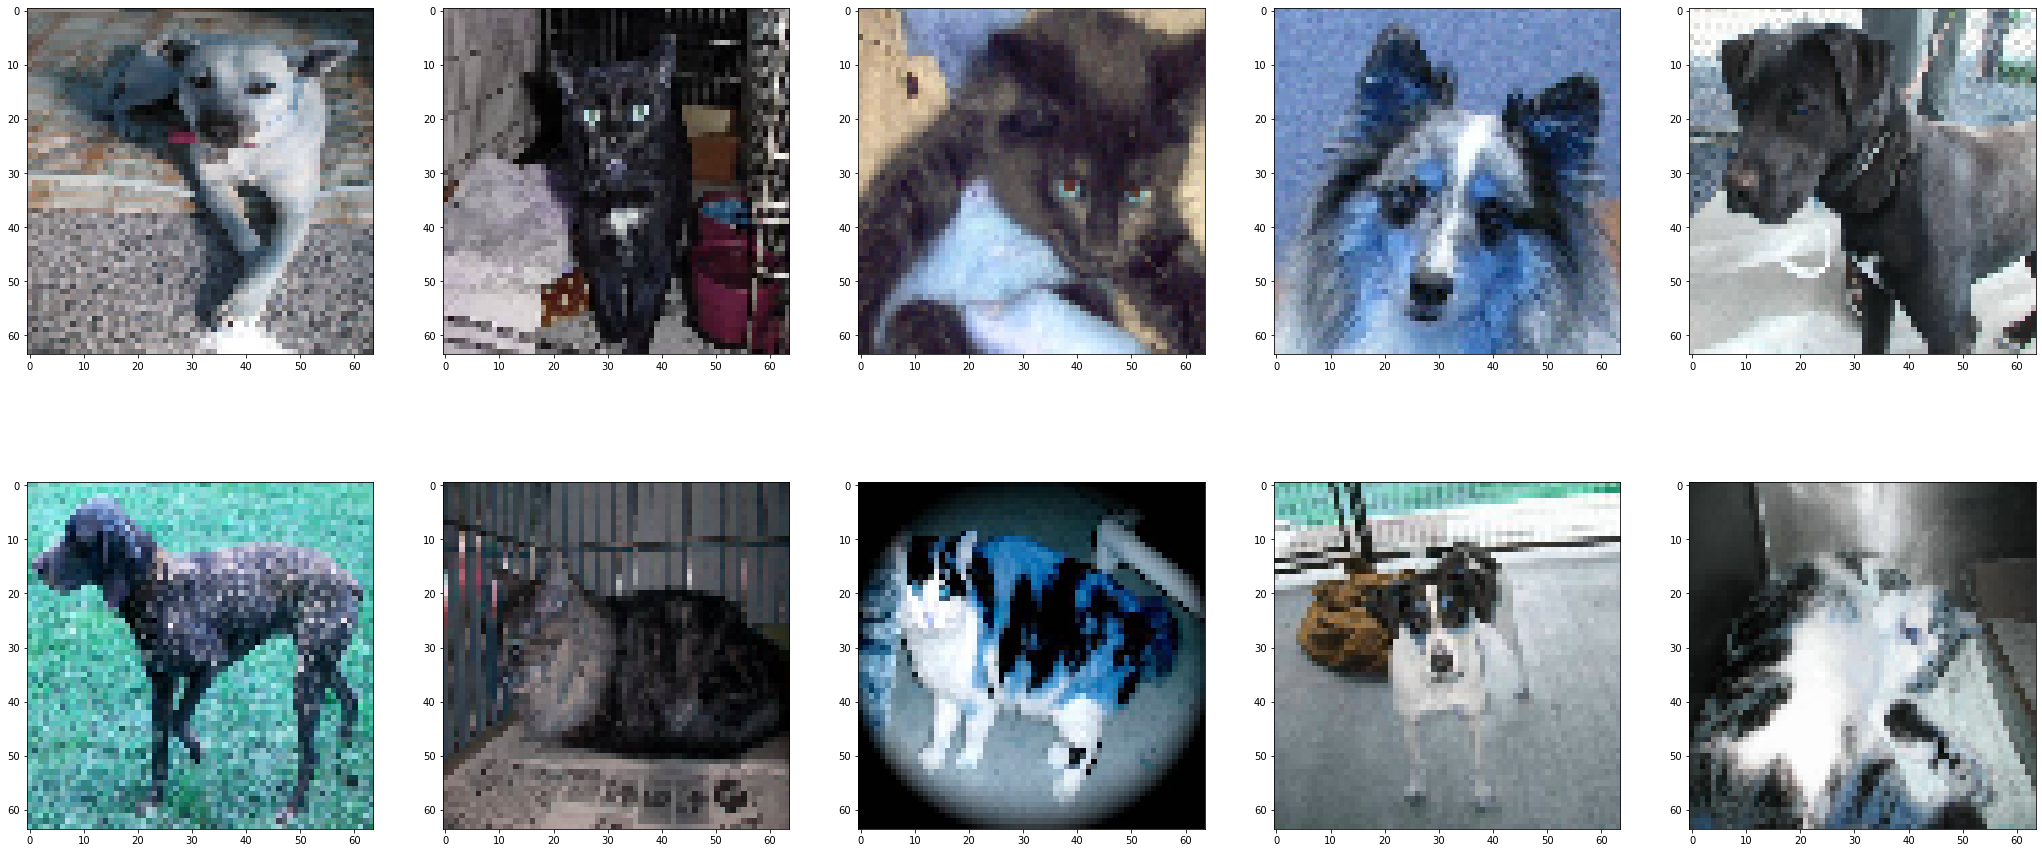

In [21]:
print("TRAIN SET")
show_ten_images(list(X_train[0:10]))

TRAIN SET
shape[0]-> shape : (64, 64, 3)


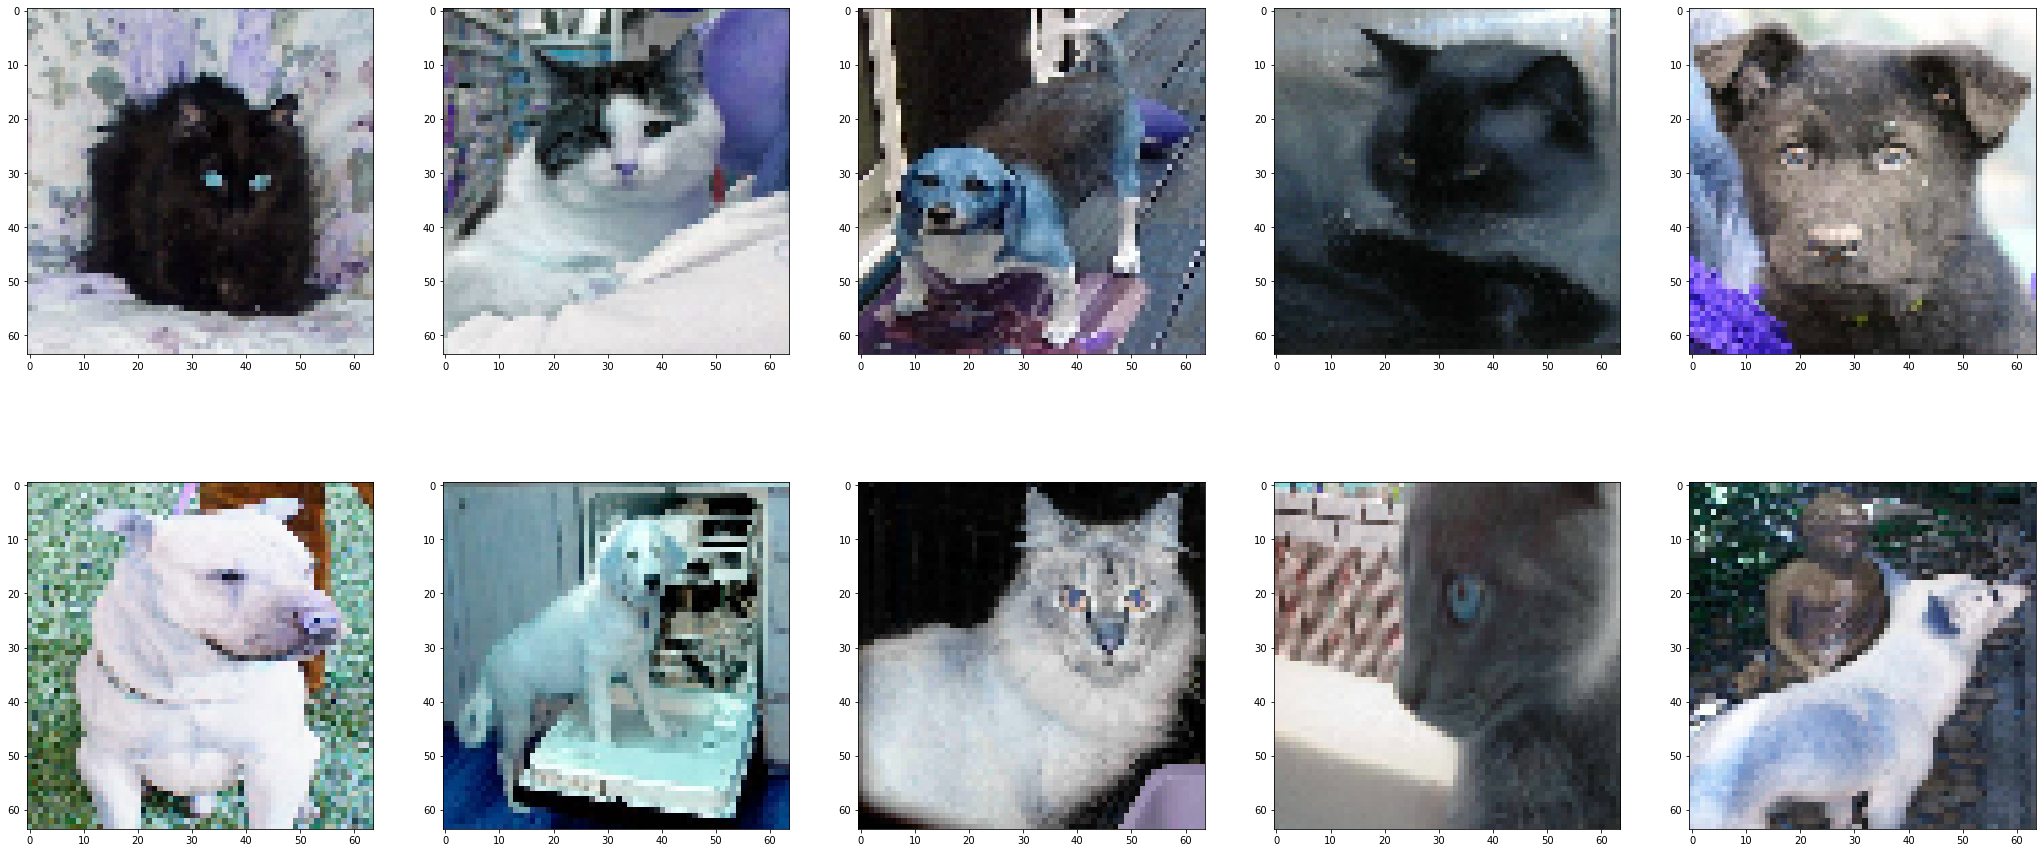

In [22]:
print("TRAIN SET")
show_ten_images(list(X_test[0:10]))

In [23]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

In [24]:
X_train = X_train / 255
X_test = X_test / 255.

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 300)
(1, 300)
(12288, 20)
(1, 20)


In [26]:
def initiliaze_weight_matrix_and_bias(dim):
    w = np.zeros((dim,1))
    b = 0

    return w,b

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
print("sigmoid(0)=%f"%(sigmoid(0)))
print("sigmoid(9.2)=%f"%(sigmoid(9.2)))
print("sigmoid([0,2]])=%s"%(str(sigmoid(np.array([0,2])))))

sigmoid(0)=0.500000
sigmoid(9.2)=0.999899
sigmoid([0,2]])=[0.5        0.88079708]


In [29]:
def predict(w, b, X):
    m = X.shape[1]
    Y_predic = np.zeros(shape=(1,m))
    w = w.reshape(X.shape[0], 1)

    Y_hat = sigmoid(np.dot(w.T, X) + b)

    print(Y_hat.shape)
    for i in range(m):
        if Y_hat[0,i] > 0.5:
            Y_predic[0, i] = 1
        else:
            Y_predic[0, i] = 0
    return Y_predic

In [30]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("predictions = " + str(predict(w, b, X)))

(1, 3)
predictions = [[1. 1. 0.]]


In [31]:
def forward_and_back_propagation_L2(w, b, lambd, X, Y):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)) + (lambd /(2*m)) * np.sum(np.square(w))

    dw = (1 / m) * np.dot(X, (Y_hat - Y).T) + lambd * w
    db = (1 / m) * np.sum(Y_hat - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [32]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = forward_and_back_propagation_L2(w, b, 0.01, X, Y)
print('dw = %s'%(grads['dw']))
print('db = %s'%(grads['db']))
print('cost = %s'%(cost))

dw = [[1.00845601]
 [2.41507239]]
db = 0.001455578136784208
cost = 5.809878652727887


In [33]:
def forward_and_back_propagation_L1(w, b, lambd, X, Y):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)) + (lambd / m) * np.sum(np.abs(w))

    dw = (1 / m) * np.dot(X, (Y_hat - Y).T) + lambd * (1*(w>0) + -1*(w<0))
    db = (1 / m) * np.sum(Y_hat - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [34]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = forward_and_back_propagation_L1(w, b, 0.01, X, Y)
print('dw = %s'%(grads['dw']))
print('db = %s'%(grads['db']))
print('cost = %s'%(cost))

dw = [[1.00845601]
 [2.40507239]]
db = 0.001455578136784208
cost = 5.811545319394553


In [35]:
def optimize_L1_L2(w, b, X, Y, flag_l2, lambd, num_iter, learning_rate):
    costs = []
    for i in range(num_iter):
        # l2 regularization
        if flag_l2 == True:
            grads, cost = forward_and_back_propagation_L2(w, b, lambd, X, Y)
        # l1 regularization
        else:
            grads, cost = forward_and_back_propagation_L1(w, b, lambd, X, Y)

        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print('Cost after iteration %d %f'%(i, cost))
            
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [36]:
params, grads, costs = optimize_L1_L2(w, b, X, Y, flag_l2 = True, lambd = 0.01, num_iter= 100, learning_rate = 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0 5.809879
w = [[0.18631742]
 [0.11709413]]
b = 1.9246528268400913
dw = [[0.67670451]
 [1.41016826]]
db = 0.219344626216827


In [37]:
def model(X_train, Y_train, X_test, Y_test, flag_l2, lambd, num_iterations, learning_rate):
    w, b = initiliaze_weight_matrix_and_bias(X_train.shape[0])
    
    parameters, grads, costs = optimize_L1_L2(w, 
                                        b, 
                                        X_train, 
                                        Y_train,
                                        flag_l2,
                                        lambd,
                                        num_iterations, 
                                        learning_rate)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)  

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
      "Y_prediction_test": Y_prediction_test, 
      "Y_prediction_train" : Y_prediction_train, 
      "w" : w, 
      "b" : b,
      "learning_rate" : learning_rate,
      "num_iterations": num_iterations}

    return d

In [38]:
print("model with L2-Regularization")
d = model(X_train, 
          Y_train, 
          X_test, 
          Y_test,
          flag_l2 = True,
          lambd = 0.001,
          num_iterations = 1001, 
          learning_rate = 0.005)

model with L2-Regularization
Cost after iteration 0 0.693147
Cost after iteration 100 0.970239
Cost after iteration 200 0.776908
Cost after iteration 300 0.632863
Cost after iteration 400 0.527863
Cost after iteration 500 0.446166
Cost after iteration 600 0.377975
Cost after iteration 700 0.321210
Cost after iteration 800 0.287944
Cost after iteration 900 0.272276
Cost after iteration 1000 0.258552
(1, 300)
(1, 20)
train accuracy: 95.0 %
test accuracy: 60.0 %


In [39]:
print("model with L1-Regularization")
d = model(X_train, 
          Y_train, 
          X_test, 
          Y_test,
          flag_l2 = False,
          lambd = 0.001,
          num_iterations = 1001, 
          learning_rate = 0.005)

model with L1-Regularization
Cost after iteration 0 0.693147
Cost after iteration 100 1.002804
Cost after iteration 200 0.834081
Cost after iteration 300 0.708434
Cost after iteration 400 0.614875
Cost after iteration 500 0.543106
Cost after iteration 600 0.485078
Cost after iteration 700 0.436155
Cost after iteration 800 0.393693
Cost after iteration 900 0.356774
Cost after iteration 1000 0.324827
(1, 300)
(1, 20)
train accuracy: 88.66666666666667 %
test accuracy: 50.0 %
